In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels


In [3]:
def normalizer(dataset):
    mu = np.mean(dataset, axis=0) #平均值
    sigma = np.std(dataset, axis=0) #方差
    return(dataset - mu)/sigma

In [4]:
def bias_vector(features, labels):
    n_training_samples = features.shape[0] #shape[0] 为第一维的长度，shape[1] 为第二维的长度
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1]) #增加一列数值1到第一列
    l = np.reshape(labels, [n_training_samples, 1]) # 行矩阵转置为列矩阵
    return f, l

In [5]:
features, labels = read_boston_data()
normalized_features = normalizer(features)
data, label = bias_vector(normalized_features, labels)
n_dim = data.shape[1]
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.25, random_state = 100)

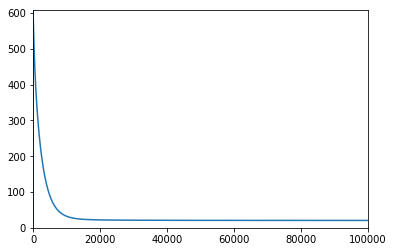

In [9]:
learning_rate = 0.0001
training_epochs = 100000
log_loss = np.empty(shape=[1], dtype=float) #一行一列的空数组
X = tf.placeholder(tf.float32,[None, n_dim]) #任意行，n_dim列，float32类型
Y = tf.placeholder(tf.float32,[None, 1]) #任意行，1列，float32类型
# 拟合函数  y = W' x + b  （向量的点积）
W = tf.Variable(tf.ones([n_dim,1])) #这里W是个列向量，n_dim行1列 。因为feature的第一列增加了数值1的列，因此w0相当于b

y_ = tf.matmul(X, W) #对应上面的拟合函数
cost_op = tf.reduce_mean(tf.square(y_ - Y)) #损失函数
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op) #利用梯度下降法，最小化损失函数

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X:train_x,Y:train_y})
    log_loss = np.append(log_loss,sess.run(cost_op,feed_dict={X:train_x,Y:train_y}))

plt.plot(range(len(log_loss)),log_loss)
plt.axis([0,training_epochs,0,np.max(log_loss)])
plt.show()

In [14]:
# Make some predictions on the test dataset and calculate the mean squared error
pred_y = sess.run(y_, feed_dict={X:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f" %(sess.run(mse)))


MSE: 27.3673


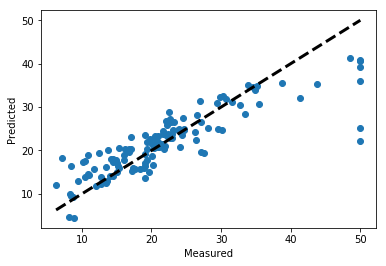

In [19]:
# Show the line of best fit
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [55]:
#### For understanding the np.c_() and np.r_(), shape[0], shape[1]

#import numpy as np
"""
a = np.array([[1,1], [2,2], [3,3]])
b = np.array([[4,4], [5,5], [6,6]])
l =  np.array([7,8,9])
c = np.c_[a,b]
r = np.r_[a,b]
s0=c.shape[0]
s1=c.shape[1]

#print(a)
#print(c)
#print(s0)
#print(s1)

data, label = bias_vector(c, l)
print(data)
print(label)
"""
n = np.empty(shape=[1,1], dtype=float)
n

array([[1.5e-323]])